# Data Augmentation

Data augmentaiton occurs when you create new data based on modifications to the origional data. Data augmentaiton on images would include transformations like:

- Flipping horizontally or vertically
- Rotating
- Zooming in or out
- Cropping
- Varying the color

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [2]:
def plotImages(images_arr):
    """
    Plots images in the form of a grid with 1 row and 10 columns.
    """
    fig, axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

In [3]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,
                         channel_shift_range=10., horizontal_flip=True)

In [4]:
chosen_image = random.choice(os.listdir("data/dogs-vs-cats/train/dog"))

In [5]:
image_path = "data/dogs-vs-cats/train/dog/" + chosen_image

In [6]:
assert os.path.isfile(image_path)

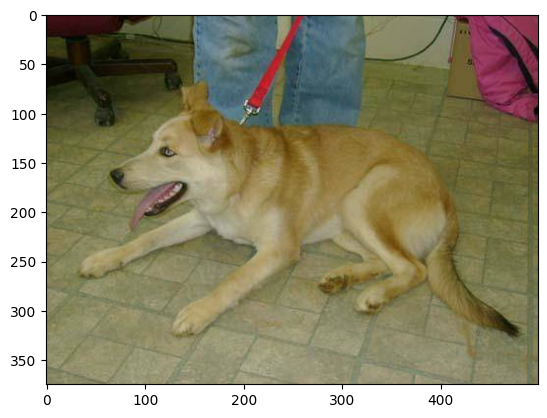

In [7]:
#Obtain image
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [8]:
#Generate (generator) for batches of augmented images from this image
aug_iter = gen.flow(image)

In [9]:
#Get 10 samples of augmented images using a list comprehension
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

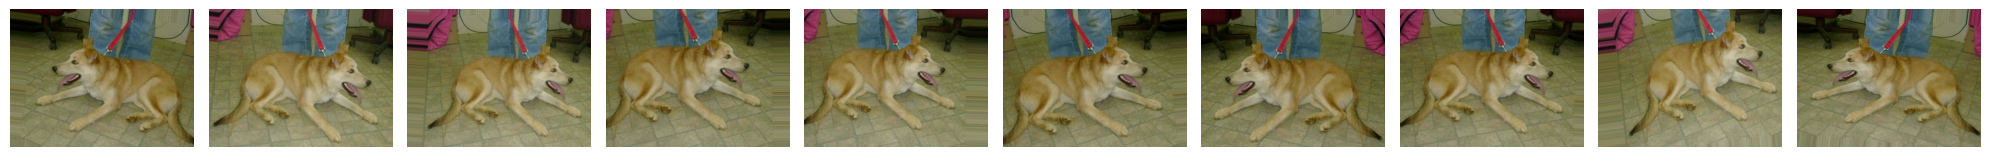

In [10]:
#Augmented images
plotImages(aug_images)

In [11]:
#Figure out how to save these. Append in a list?